In [7]:
from importlib import reload
from scipy.stats import boxcox
from dfprepare import norm_data

import RRR
reload(RRR)
from RRR import *

import Task_3.LRR as LRR
reload(LRR)
from Task_3.LRR import *

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


,X1,X2,X3
0,0.100,0.214286,0.113208
1,0.375,0.464286,0.320755
2,0.625,0.750000,0.509434
3,0.850,0.964286,0.830189
4,0.650,0.642857,0.547170
5,1.000,1.000000,1.000000
6,0.225,0.285714,0.396226
7,0.525,0.535714,0.396226
8,0.775,0.678571,0.754717
9,0.000,0.000000,0.000000


<Axes: >

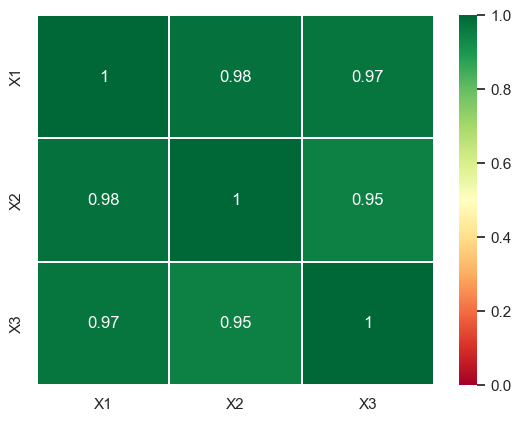

In [8]:
# Read dataframe
data = pd.read_excel('blood.xlsx')
data.dropna(inplace=True)
display(data)

# Dependent variable
explore_column = 'X1' 
 
# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

### Гребневая регрессия

In [9]:
ridge_research = RidgeRegressionResearch(data, column=explore_column)
ridge_research.info()
ridge_research.draw_plots()
ridge_new_model, selected_features_ridge = ridge_research.stepwise_selection(criteria='AIC')

                                      X1                                      
Dep. Variable:                     X1   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           7.01e-07
Time:                        18:57:04   Log-Likelihood:                 17.472
No. Observations:                  11   AIC:                            -26.94
Df Residuals:                       8   BIC:                            -25.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0365      0.038     -0.966      0.3

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,Variable,VIF,Tolerance
0,X2,36.241532,0.027593
1,X3,36.241532,0.027593


AttributeError: 'Index' object has no attribute 'params'

In [ ]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1e-6 чтобы не было 0-значений

new_data = data[selected_features_ridge]
new_explore_column = explore_column + '_t'
new_data[new_explore_column] = y_transformed

# Проводим анализ заново
enhanced_research = RidgeRegressionResearch(new_data, column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()

### Линейная регрессия

In [ ]:
linear_research = LinearRegressionResearch(data, column=explore_column)
linear_research.info()
linear_research.draw_plots()
linear_new_model, selected_features_linear = linear_research.stepwise_selection(criteria='AIC')

In [ ]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1e-6 чтобы не было 0-значений

new_data = data[selected_features_linear]
new_explore_column = explore_column + '_t'
new_data[new_explore_column] = y_transformed

# Проводим анализ заново
enhanced_research = LinearRegressionResearch(new_data, column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()